#**Random Forest**

### **Random Forest**

Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
index = pd.read_excel('/content/glass.xlsx', sheet_name=0)

In [ ]:
index

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [ ]:
data = pd.read_excel('/content/glass.xlsx', sheet_name=1 )

In [ ]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Dataset contains float datatypes as independent variable and int as target variable

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.shape

(214, 10)

## **Exploratory Data Analysis (EDA):**

There are no null values

In [ ]:
data.isnull().sum().sum()

0

Duplicate Values

In [ ]:
data.duplicated().sum()

1

In [ ]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


We have 1 duplicate_row & need to drop it

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

Boxplot

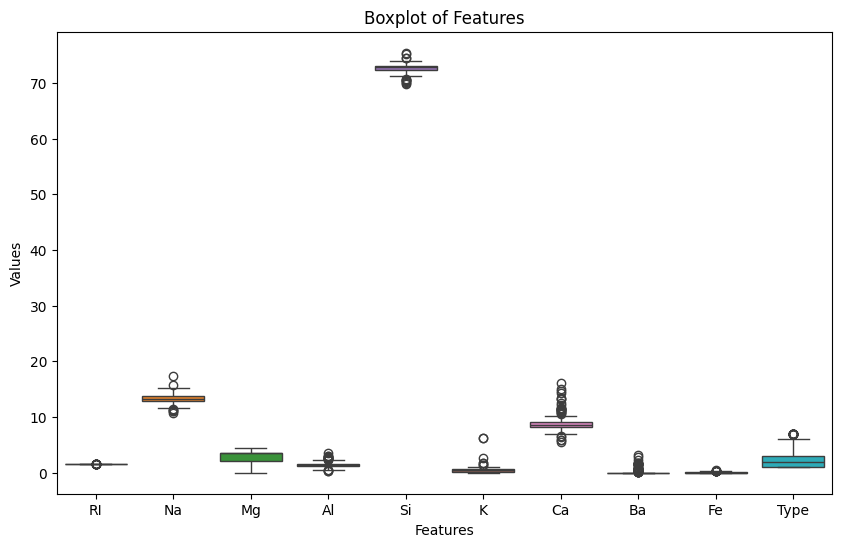

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Features')
plt.show()

Check for inconsistencies in the data


In [ ]:
print("\nCount of each class in the target variable:")
print(data['Type'].value_counts())



Count of each class in the target variable:
Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [ ]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## **Data Visualization:**

Histograms for numeric features

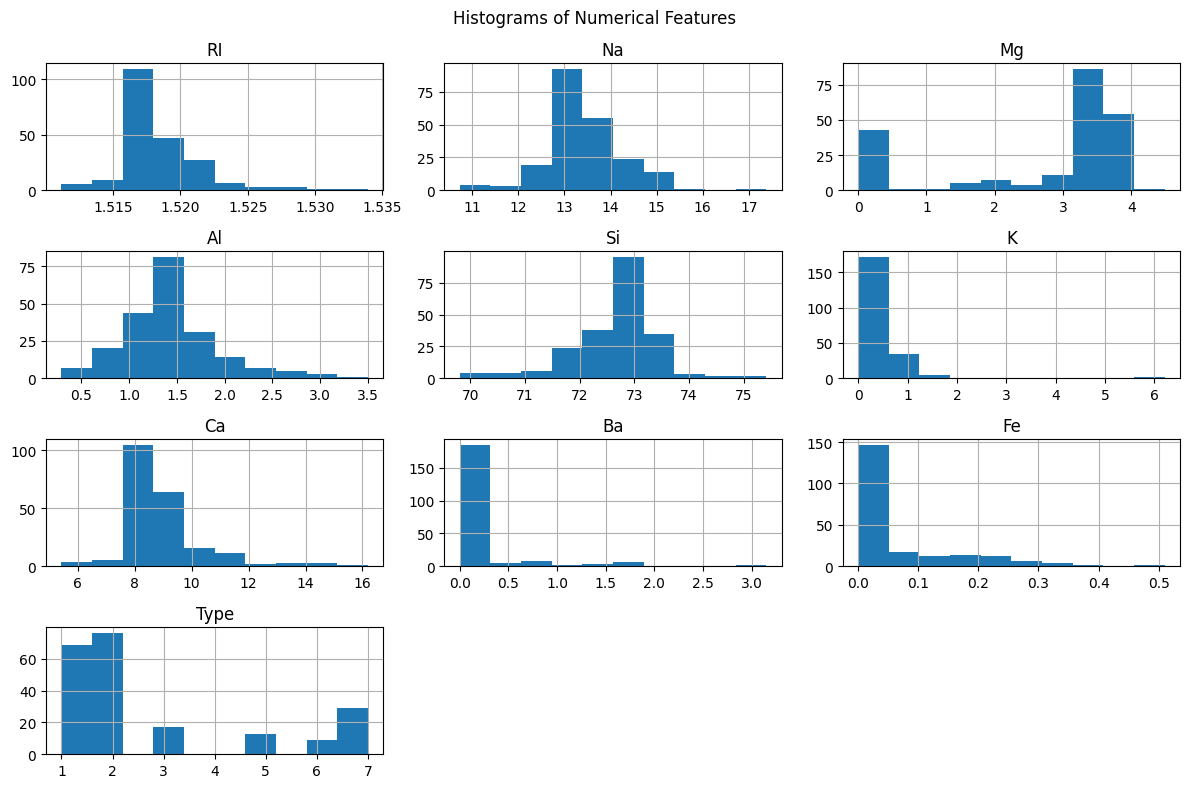

In [ ]:
data.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

Pairplot fro numerical features

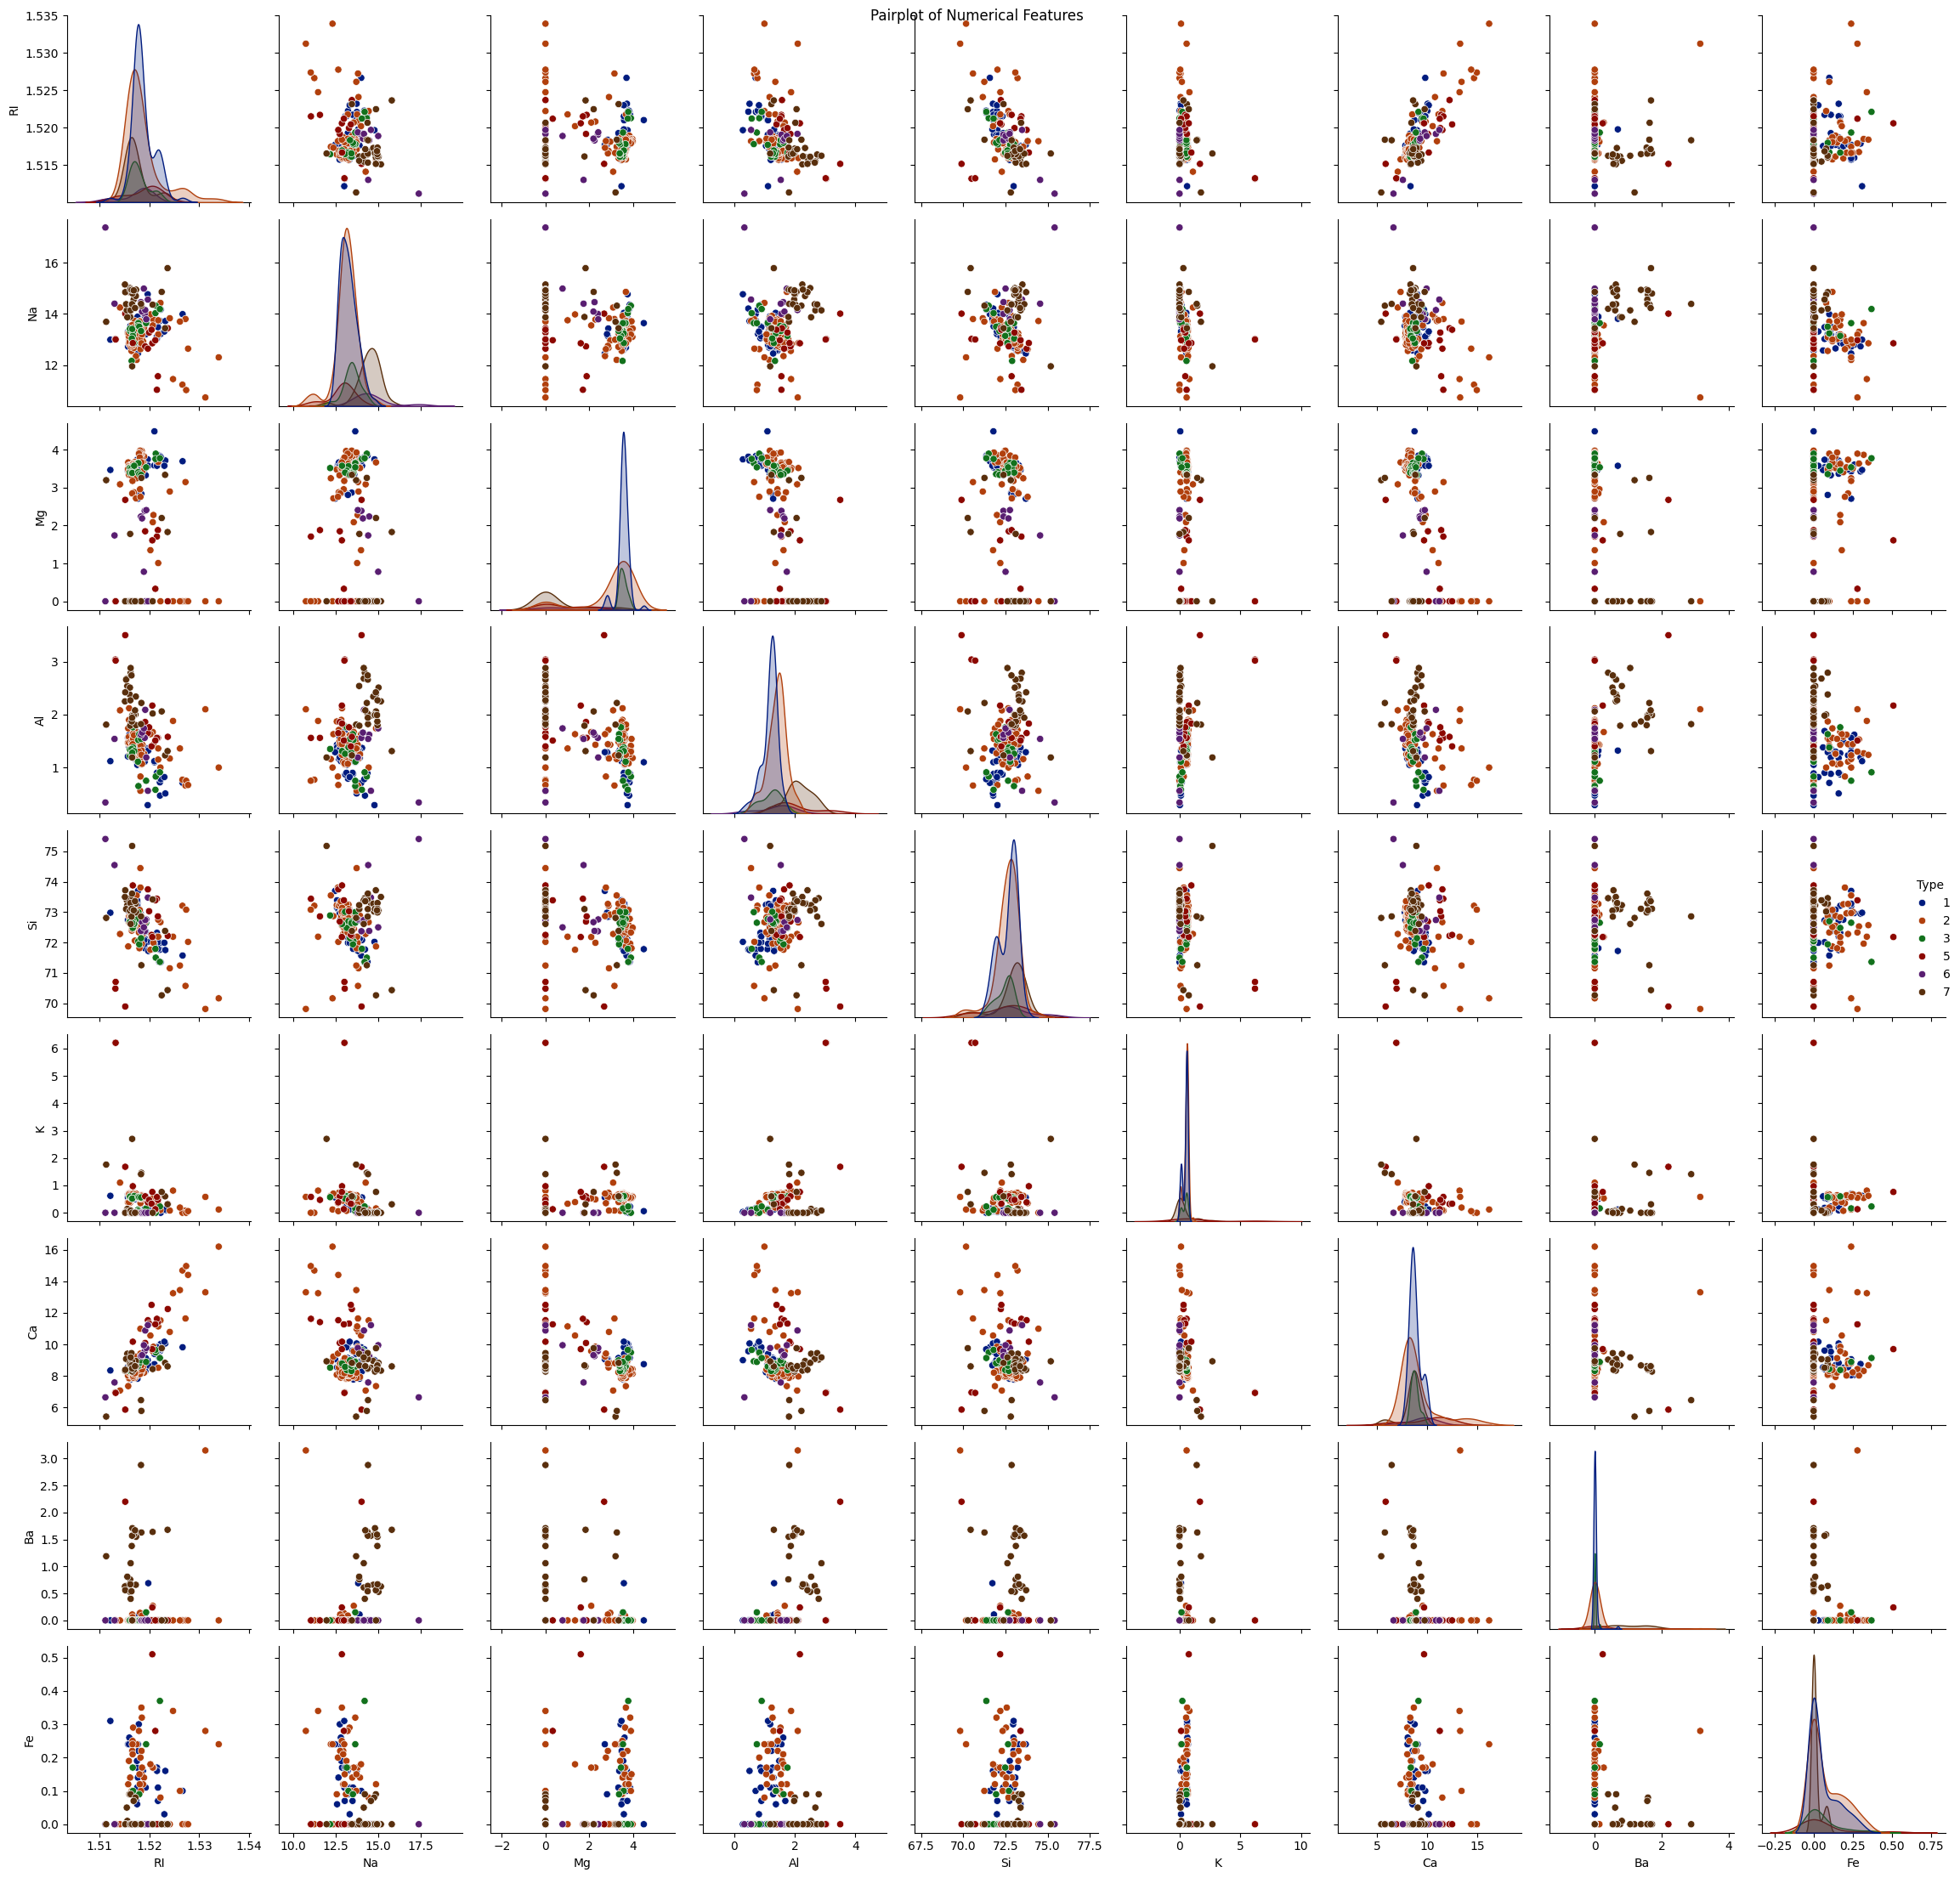

In [ ]:
sns.pairplot(data, hue='Type',palette='dark')
plt.suptitle('Pairplot of Numerical Features')
plt.tight_layout()
plt.show()

### **Analyze any patterns or correlations observed in the data.**
**Histograms of Numerical Features:**
The histograms display the distribution of each numerical feature. Certain features, such as the refractive index, exhibit a normal distribution, while others, like calcium oxide content, show skewness. This helps in understanding the central tendency and variability in the data for each feature.

**Box Plots of Numerical Features:**
The box plots provide a visual representation of the spread and possible outliers for each numerical feature. Features like aluminum oxide and silicon oxide content reveal potential outliers, offering insight into unusual or extreme values in the data that may need further attention or transformation.

**Pair Plot of Numerical Features:**
The pair plot helps in identifying relationships between pairs of numerical features. For instance, there is a positive correlation between the refractive index and calcium oxide content and a negative correlation between refractive index and magnesium oxide content. This indicates how certain features are related to each other, which can guide feature selection and modeling.

**Pair Plot with Hue by 'Type':**
When visualizing the pair plot with glass type as the hue, we can observe the separation and overlap between different glass types. Certain features, like refractive index, show a clearer distinction between types, while other features overlap, suggesting that some features are more effective in classifying glass types than others.

## **Data Preprocessing**

Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

In [ ]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


There is no feature with categorical datatype in Glass Dataset, as all columns have numerical data types. Therefore, we don't need to apply encoding techniques like one-hot encoding to convert categorical variables into numerical format.

Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale.

In [ ]:
X = data.drop('Type', axis=1)
y = data['Type']

In [ ]:
std = StandardScaler()
X_scaled = std.fit_transform(X)
X_scaled

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [ ]:
# Handling imbalanced data with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after resampling:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


In [ ]:
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Type'] = y_resampled
data_resampled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,1
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,1
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,1
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,1
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,1
...,...,...,...,...,...,...,...,...,...,...
451,-0.941328,0.754304,-1.860172,2.359921,0.858632,-0.601406,0.188909,1.054213,-0.259398,7
452,-0.495616,1.818448,-1.860172,1.090555,0.552817,-0.765554,-0.381458,2.841073,-0.519703,7
453,-0.719616,-0.910856,-1.860172,0.487350,2.333440,1.921019,0.108193,0.250454,-0.550214,7
454,-0.420645,1.836458,-1.860172,0.835631,0.485209,-0.765554,-0.318705,2.871036,-0.588301,7


 firstly,separates the features (X) and the target variable (y) from the dataset.

Then, it applies standardization to the features using StandardScaler.

After that, it uses SMOTE to handle the imbalanced data by oversampling the minority class

## **Random Forest Model Implementation**

In [ ]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [ ]:
# Initialize the Random Forest classifier
rfe = RandomForestClassifier()

#train the dataset
rfe.fit(X_train,y_train)

#predict on the test data
y_pred = rfe.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9456521739130435


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        17
           2       1.00      0.89      0.94        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.96        92
   macro avg       0.95      0.96      0.96        92
weighted avg       0.96      0.96      0.96        92



In [ ]:
# Confusion matrix
print("\nConfusion Matrix:")
confusion_matrix(y_test, y_pred)


Confusion Matrix:


array([[15,  0,  2,  0,  0,  0],
       [ 2, 17,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0, 18]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Evaluation Metrics:
Precision: 0.960144927536232
Recall: 0.9565217391304348
F1-score: 0.9569060166886254


## **Bagging and Boosting Methods**

Bagging using RandomForestClassifer Model

In [ ]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Initialize Bagging classifier with Random Forest base estimator
#bagging_rf_classifier = BaggingClassifier(estimator=RandomForestClassifier(random_state=42),n_estimators=100, random_state=42,max_features=3)
bagging_rf_classifier= RandomForestClassifier( n_estimators=100, random_state=42,max_features=3)
# Train the Bagging classifier
bagging_rf_classifier.fit(X_train, y_train)

# Predict on the test set using Bagging with Random Forest
y_pred_bagging_rf = bagging_rf_classifier.predict(X_test)


# Initialize Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier
gradient_boosting_classifier.fit(X_train, y_train)

# Predict on the test set using Gradient Boosting
y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)


In [ ]:
# Evaluate the Bagging with Random Forest model
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
print("Accuracy (Bagging with Random Forest):", accuracy_bagging_rf)

# Precision, Recall, and F1-score for Bagging with Random Forest
precision_bagging_rf = precision_score(y_test, y_pred_bagging_rf, average='weighted')
recall_bagging_rf = recall_score(y_test, y_pred_bagging_rf, average='weighted')
f1_bagging_rf = f1_score(y_test, y_pred_bagging_rf, average='weighted')

# Print evaluation metrics for Bagging with Random Forest
print("\nEvaluation Metrics for Bagging with Random Forest:")
print("Precision:", precision_bagging_rf)
print("Recall:", recall_bagging_rf)
print("F1-score:", f1_bagging_rf)

Accuracy (Bagging with Random Forest): 0.9456521739130435

Evaluation Metrics for Bagging with Random Forest:
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


In [ ]:
# Evaluate the Gradient Boosting model
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print("Accuracy (Gradient Boosting):", accuracy_gradient_boosting)

# Precision, Recall, and F1-score for Gradient Boosting
precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting, average='weighted')
recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting, average='weighted')
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nEvaluation Metrics for Gradient Boosting:")
print("Precision:", precision_gradient_boosting)
print("Recall:", recall_gradient_boosting)
print("F1-score:", f1_gradient_boosting)

Accuracy (Gradient Boosting): 0.9239130434782609

Evaluation Metrics for Gradient Boosting:
Precision: 0.9312116778149387
Recall: 0.9239130434782609
F1-score: 0.9242856142667106


##**Insights:**

Based on the accuracy results obtained from different ensemble methods:

**Random Forest:**

Accuracy: 94.57%


Random Forest is an ensemble learning method based on decision trees. It builds multiple decision trees and merges their predictions to improve accuracy. With an accuracy of 94.57%, Random Forest performed quite well on the dataset. Random Forest is robust to overfitting and noise in the data due to its ensemble nature, which helps in achieving higher accuracy.

**Bagging with Random Forest:**

Accuracy: 94.57%


Bagging (Bootstrap Aggregating) is a technique that uses multiple models trained on different subsets of the training data and combines their predictions.


Bagging with Random Forest involves using the Random Forest algorithm within the bagging framework.


The accuracy obtained with Bagging and Random Forest is the same as that of the Random Forest alone, indicating that bagging did not significantly improve the model's performance in this case.

**Gradient Boosting:**

Accuracy: 92.39%


Gradient Boosting is another ensemble learning technique that builds multiple weak learners (typically decision trees) sequentially, with each subsequent learner focusing on the errors made by the previous ones.

While Gradient Boosting achieved a slightly lower accuracy compared to Random Forest, it still performed well with an accuracy of 92.39%.

Gradient Boosting tends to be more sensitive to overfitting compared to Random Forest, which might explain the slightly lower accuracy.

## **insights:**

Both Random Forest and Bagging with Random Forest achieved the same accuracy, suggesting that bagging did not provide additional benefits in this scenario.

Gradient Boosting, while slightly lower in accuracy compared to Random Forest, still produced competitive results.

The choice between these ensemble methods may depend on factors such as computational resources, interpretability, and sensitivity to overfitting.

## **Additional Notes:**
**1. Explain Bagging and Boosting methods. How is it different from each other.**

**Ans:** **Bagging and Boosting Methods
Bagging (Bootstrap Aggregating):**

Definition: Bagging is an ensemble learning technique that aims to improve the stability and accuracy of machine learning algorithms by combining the predictions of multiple models. It is primarily used for reducing variance and preventing overfitting.

How it Works:

Multiple bootstrap samples are drawn from the training dataset. Each sample is created by randomly selecting instances with replacement.
A separate model (often the same type, like a decision tree) is trained on each bootstrap sample.
The final prediction is made by aggregating the predictions from all the models, typically through majority voting (for classification) or averaging (for regression).

Key Characteristics:

Reduces overfitting by averaging predictions.
Suitable for high-variance models, like decision trees.
Boosting:

Definition: Boosting is another ensemble learning technique that focuses on converting weak learners into strong learners by sequentially training models. It is primarily used for improving accuracy.

How it Works:

Models are trained sequentially, with each new model focusing on the errors made by the previous ones.
The misclassified instances are given higher weights, so the next model attempts to correct the mistakes.
The final prediction is a weighted sum of the predictions from all the models.
Key Characteristics:

Reduces both bias and variance.
Often leads to higher accuracy than bagging but is more prone to overfitting if not carefully managed.

**2. Explain how to handle imbalance in the data.**

**Ans**

Handling imbalance in the data is crucial in machine learning tasks, especially in classification problems where one class may dominate the dataset. Here are some common techniques to address class imbalance:

**Resampling Techniques:**
**Oversampling:**

Increase the number of instances in the minority class by randomly duplicating them or generating synthetic samples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).

**Undersampling:**

Reduce the number of instances in the majority class by randomly removing samples until the class distribution is balanced.

**Algorithmic Techniques:**

**Class Weighting:**

Assign higher weights to instances of the minority class during model training to penalize misclassifications more heavily.

**Ensemble Methods:**

Use ensemble algorithms like Bagging and Boosting with techniques specifically designed to handle class imbalance (e.g., BalancedBaggingClassifier, BalancedRandomForestClassifier).

**Cost-sensitive Learning:**

Adjust the cost function to reflect the imbalance in class distribution, penalizing misclassifications of the minority class more severely.

**Data-level Techniques:**

Collect More Data: If possible, collect more data for the minority class to balance the dataset naturally.

**Feature Engineering:**

Create informative features that help the model distinguish between classes more effectively, reducing the impact of class imbalance.

Choosing the appropriate technique depends on factors such as the severity of class imbalance, dataset size, computational resources, and the specific characteristics of the problem domain.

It's often beneficial to experiment with different approaches to find the most effective solution for a particular dataset.
